Project 1

Predict insurance charges based on the data

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')   

In [10]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EDA

In [19]:
df.shape #gives the number of rows and columns

(1338, 7)

In [18]:
df.info() #gives the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
df.describe() #gives statistical measures of numerical columns

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
df.isnull().sum() # this gives the count of missing values in each column

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [20]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

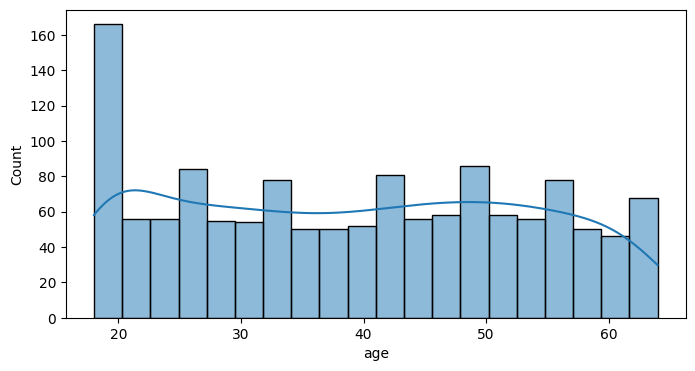

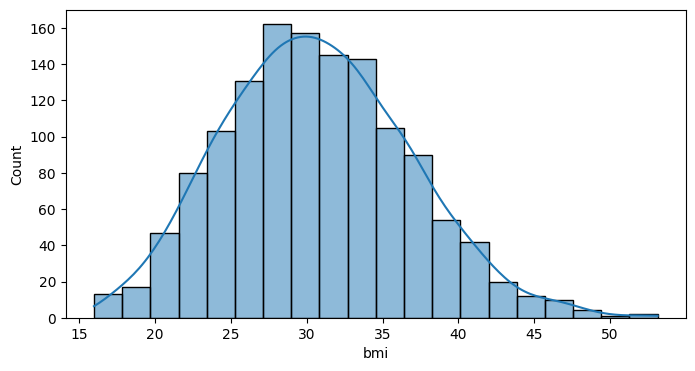

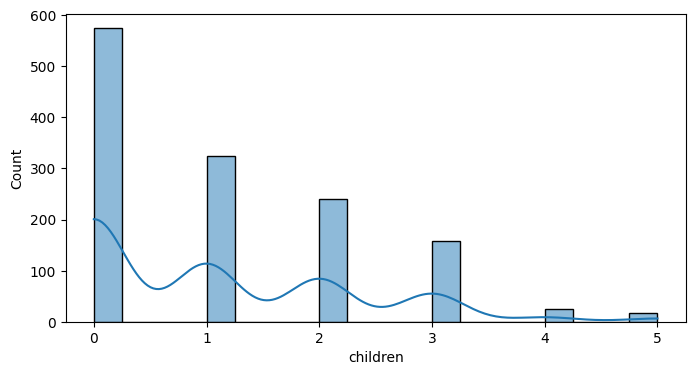

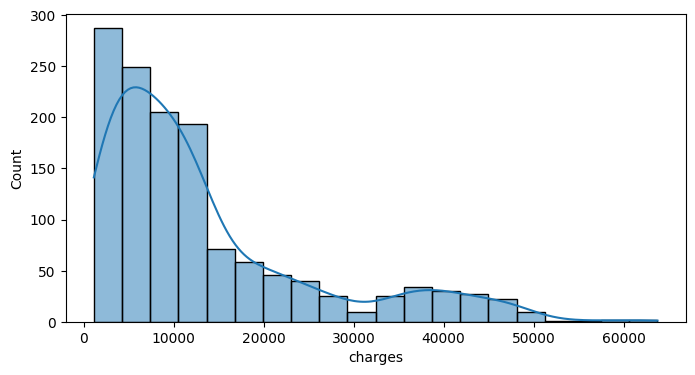

In [23]:
numeric_columns=['age','bmi', 'children', 'charges']

#histplot gives the distribution of numerical columns

for col in numeric_columns: #for each numerical column 
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=20)
    

Text(0.5, 1.0, 'Count of Smokers vs Non-Smokers')

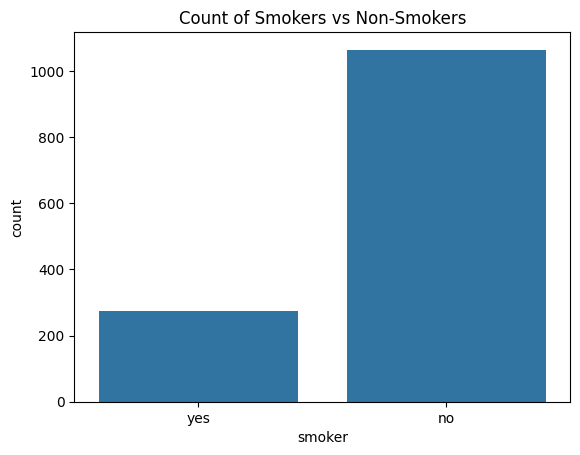

In [24]:
#countplot gives the count of each category in categorical columns

sns.countplot(x='smoker', data=df)
plt.title('Count of Smokers vs Non-Smokers')

<Axes: xlabel='sex', ylabel='count'>

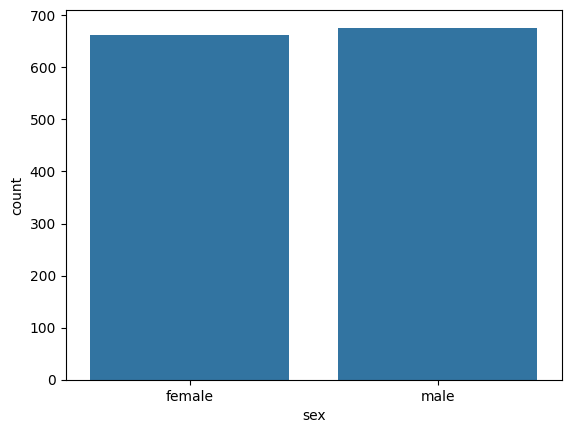

In [25]:
sns.countplot(x='sex', data=df)

<Axes: xlabel='sex', ylabel='count'>

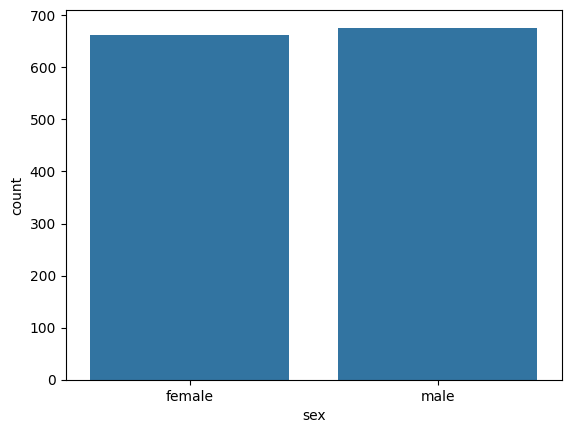

In [26]:
sns.countplot(x=df['sex'])

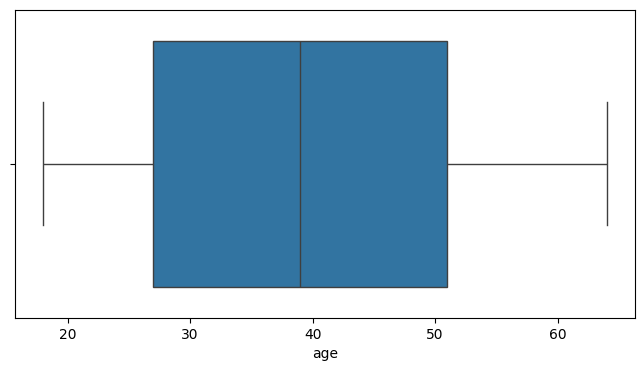

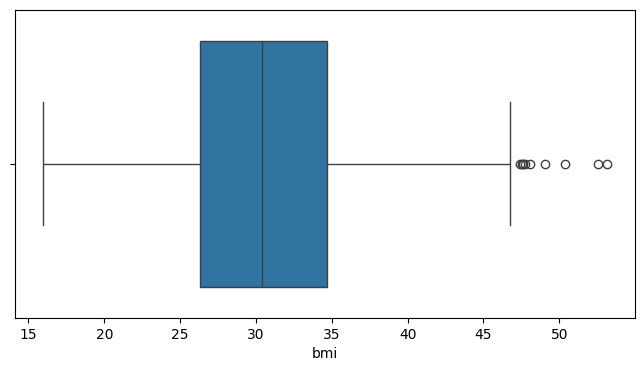

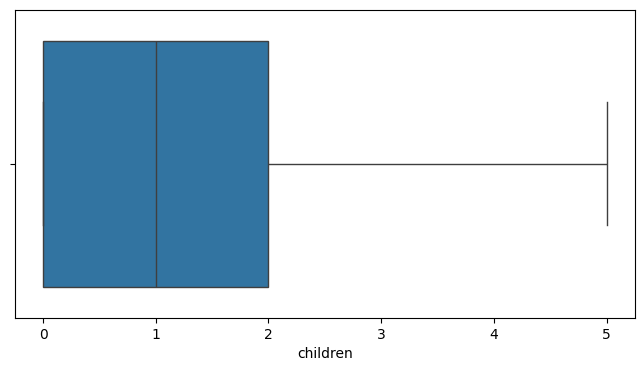

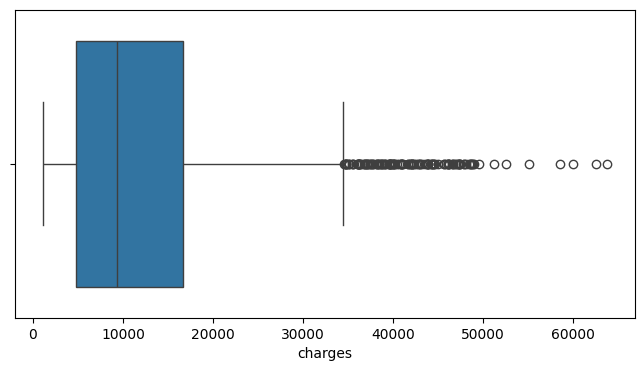

In [27]:
#boxplot to see the distribution

for col in numeric_columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])




<Axes: >

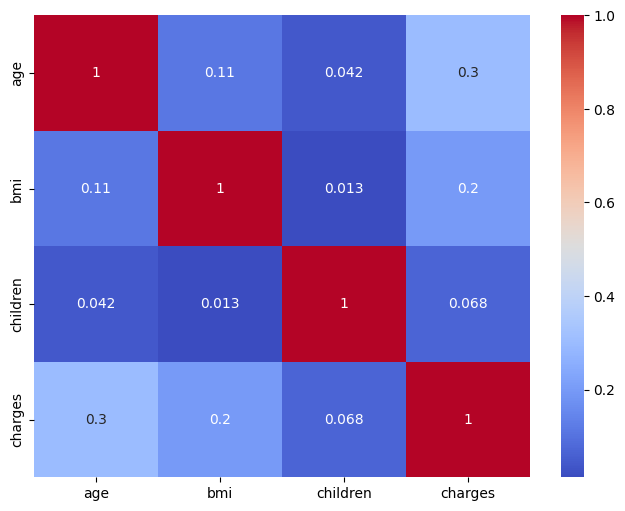

In [29]:
#correlation map to see the correlation between numerical columns

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

# Data cleaning and Preprocessing

In [60]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [147]:
df_cleaned1 = df.copy()
df_cleaned1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [148]:
df.shape

(1338, 7)

In [149]:
df_cleaned1.drop_duplicates(inplace=True)
df_cleaned1.shape

(1337, 7)

In [150]:
df_cleaned1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [151]:
df_cleaned1.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [152]:
df_cleaned1['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [153]:
df_cleaned1['sex']=df_cleaned1['sex'].map({'male':0, 'female':1})  #label encoding   

In [154]:
df_cleaned1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [155]:
df_cleaned1['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [156]:
df_cleaned1['smoker']=df_cleaned1['smoker'].map({'yes':1, 'no':0})  #label encoding

In [157]:
df_cleaned1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [158]:
#rename columns

df_cleaned1.rename(columns={'sex':'is_female', 'smoker':'is_smoker'}, inplace=True)

In [159]:
df_cleaned1.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [160]:
df_cleaned['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [161]:
df_cleaned1=pd.get_dummies(df_cleaned1, columns=['region'], drop_first=True)
df_cleaned1.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [162]:
df_cleaned1.astype(int)

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


# Feature Engineering and Extraction

<Axes: xlabel='bmi', ylabel='Count'>

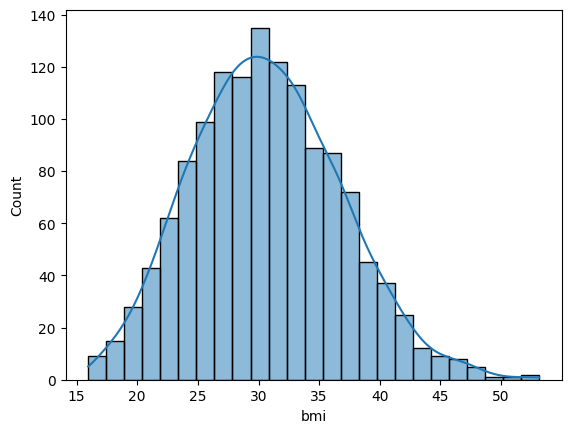

In [163]:
sns.histplot(df_cleaned1['bmi'],kde=True)

In [164]:
df_cleaned1['bmi_category']=pd.cut(df_cleaned1['bmi'], bins=[0,18.5,24.9,29.9,100], labels=['Underweight','Normal weight','Overweight','Obesity'])

In [165]:
df_cleaned1.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27.900,0,1,16884.92400,False,False,True,Overweight
1,18,0,33.770,1,0,1725.55230,False,True,False,Obesity
2,28,0,33.000,3,0,4449.46200,False,True,False,Obesity
3,33,0,22.705,0,0,21984.47061,True,False,False,Normal weight
4,32,0,28.880,0,0,3866.85520,True,False,False,Overweight


In [166]:
df_cleaned1=pd.get_dummies(df_cleaned1, columns=['bmi_category'], drop_first=True)

In [169]:
df_cleaned1=df_cleaned1.astype(int)

In [170]:
df_cleaned1

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal weight,bmi_category_Overweight,bmi_category_Obesity
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,0,0,1
1334,18,1,31,0,0,2205,0,0,0,0,0,1
1335,18,1,36,0,0,1629,0,1,0,0,0,1
1336,21,1,25,0,0,2007,0,0,1,0,1,0


In [171]:
df_cleaned1.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal weight', 'bmi_category_Overweight',
       'bmi_category_Obesity'],
      dtype='object')

In [172]:
from sklearn.preprocessing import StandardScaler

cols=['age','bmi','children']

scaler=StandardScaler()
df_cleaned1[cols] = scaler.fit_transform(df_cleaned1[cols])

In [174]:
df_cleaned1.head() #all values are now standardized between mean 0 and standard deviation 1

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal weight,bmi_category_Overweight,bmi_category_Obesity
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


In [175]:
#pearson correlation 

from scipy.stats import pearsonr

#list of selected features for correlation analysis
selected_features=['age','bmi','children','is_female','is_smoker','region_northwest','region_southeast','region_southwest','bmi_category_Normal weight','bmi_category_Overweight','bmi_category_Obesity']

correlations={
    feature: pearsonr(df_cleaned1[feature], df_cleaned1['charges'])[0]
    for feature in selected_features
}

correlations_df=pd.DataFrame(list(correlations.items()), columns=['Feature','Pearson Correlation with Charges'])
correlations_df.sort_values(by='Pearson Correlation with Charges', ascending=False)


,Feature,Pearson Correlation with Charges
4,is_smoker,0.787234
0,age,0.298309
10,bmi_category_Obesity,0.197660
1,bmi,0.196236
6,region_southeast,0.073577
2,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
3,is_female,-0.058046
8,bmi_category_Normal weight,-0.105656


In [182]:
cat_features=['is_female','is_smoker',
'region_northwest','region_southeast','region_southwest',
'bmi_category_Normal weight','bmi_category_Overweight','bmi_category_Obesity'
]


In [185]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

df_cleaned1['charges_bin'] = pd.qcut(df_cleaned1['charges'], q=4, labels=False)
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_cleaned1[col], df_cleaned1['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }



In [186]:
chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi_category_Obesity,7.654464,0.05372,Accept Null (Drop Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_Normal weight,4.263673,0.234364,Accept Null (Drop Feature)
bmi_category_Overweight,4.201575,0.240504,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [188]:
final_df = df_cleaned1[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges','region_southeast','bmi_category_Obesity']]

In [189]:
final_df

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obesity
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1
2,-0.799350,0,0.462463,1.580143,0,4449,1,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,1
1335,-1.511647,1,0.952670,-0.909234,0,1629,1,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0


In [190]:
df_cleaned1

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal weight,bmi_category_Overweight,bmi_category_Obesity,charges_bin
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0,3
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1,0
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1,0
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0,3
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,1,0,0,0,0,1,2
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,0,0,0,0,1,0
1335,-1.511647,1,0.952670,-0.909234,0,1629,0,1,0,0,0,1,0
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0,1,0,1,0,0
